# <center><font color = blue >Logistic Regression</font></center>

## Dataset Description:

1. Title of Database: Abalone data
3. Number of Instances: 4177
1. Number of Attributes: 8
1. Attribute information:

>  Given is the attribute name, attribute type, the measurement unit and a brief description

	|Name		   Data Type	    Meas.	Description
	----		   ---------	   -----	-----------
    Sex		       nominal			     M, F, and I (infant)
	Length		    continuous	mm	    Longest shell measurement
	Diameter	      continuous	mm	    perpendicular to length
	Height		    continuous	mm	    with meat in shell
	Whole weight      continuous	grams	 whole abalone
	Shucked weight    continuous	grams	 weight of meat
	Viscera weight    continuous	grams	 gut weight (after bleeding)
	Shell weight      continuous	grams	 after being dried
	Rings		     integer			   +1.5 gives the age in years


** <font color= green >AIM: To predict the gender of abalone using Logistic Regression Classifier </font> **



## Loading Libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv("abalone.csv")
df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex                4177 non-null object
Length             4177 non-null float64
Diameter           4177 non-null float64
Height             4177 non-null float64
Whole weight       4177 non-null float64
Shucked weight     4177 non-null float64
Viscera weight     4177 non-null float64
Shell weight       4177 non-null float64
Rings              4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**Summary : **
1. the above table describes that we dont have any missing values. thats great!!!!
1. the mean and median values are almost similar in all the variables.
1. Standard deviation is zero in all variables (except Rings) which tells that the datapoints are much closer.

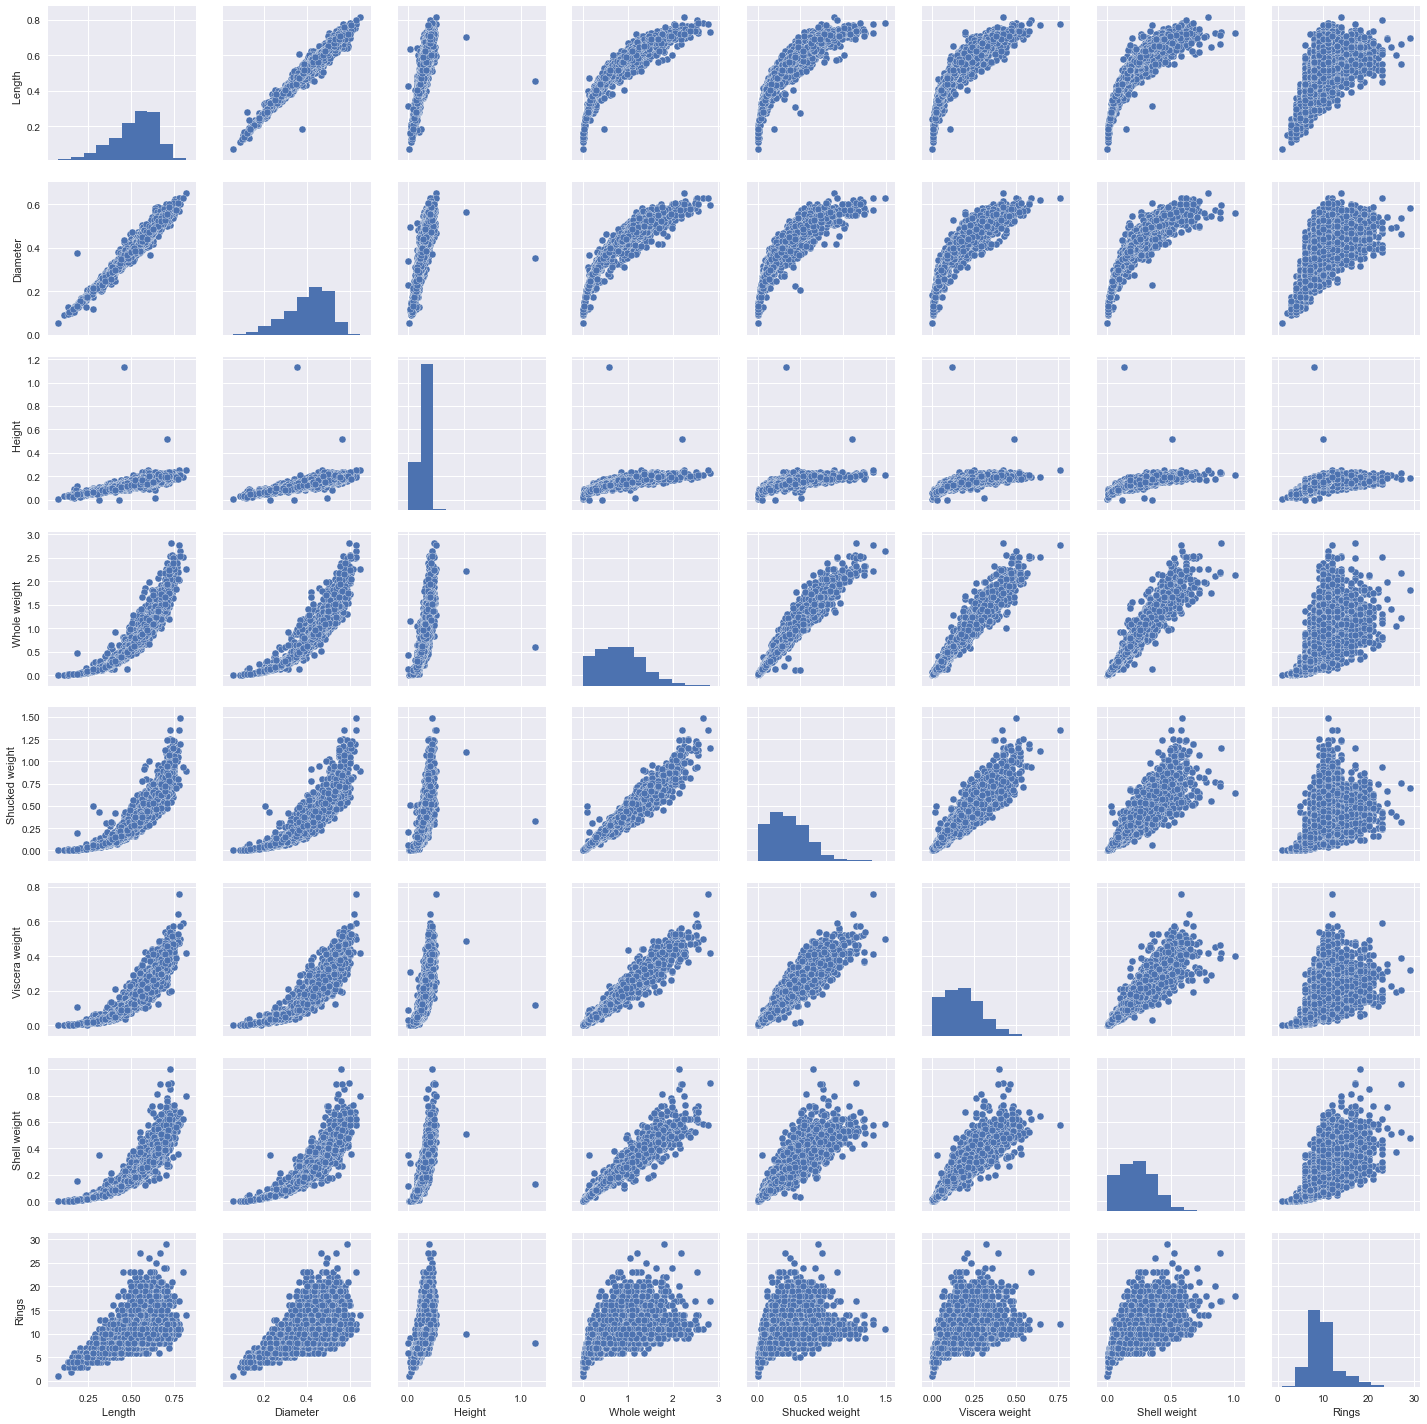

In [8]:
sns.pairplot(df)

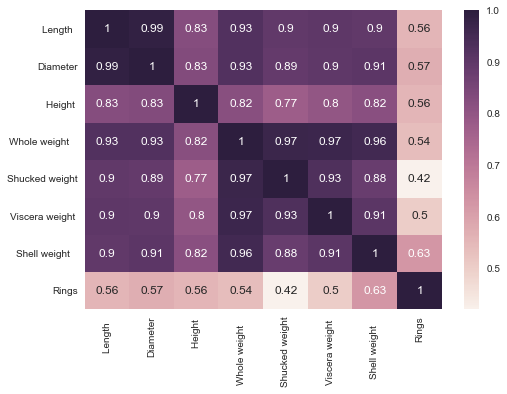

In [9]:
sns.heatmap(df.corr(),annot = True)

** Summary: **
1. this heatmap shows that Diameter and length are highly correlated and either of them can be used whilde model building.
2. we can see a linear pattern in all the variable with "weight" . which is obvious as whole weight is the combination of other weight variable
3. we need to scale the data as they are not in same units. we will do it just before training model.
4. Ring variable does not have much of the correlation.

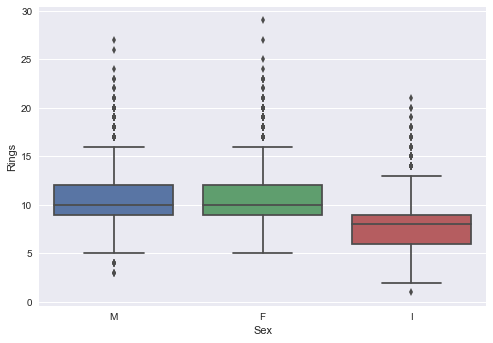

In [10]:
sns.boxplot(x = "Sex", y = 'Rings', data = df)

** Summary: **
1. the above plot shows that there is not much difference between male and female abalone if we compare them on the basis of rings.
2. infants have the lesser rings 

## Defining target variable and predictor variable:

In [11]:
y = df["Sex"]
x = df.drop("Sex",axis = 1)

In [12]:
y.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## Standardising the predictor variable

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [15]:
x.shape

(4177, 8)

## Training and splitting

In [16]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = False)

In [17]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting 

In [18]:
predic = logreg.predict(test_x)

## Evaluating: this time measure used is Accuracy

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [23]:
print(confusion_matrix(test_y,predic))

[[118  58 140]
 [ 23 295  41]
 [103  93 174]]


In [21]:
print(classification_report(test_y,predic))

             precision    recall  f1-score   support

          F       0.48      0.37      0.42       316
          I       0.66      0.82      0.73       359
          M       0.49      0.47      0.48       370

avg / total       0.55      0.56      0.55      1045



In [22]:
print(accuracy_score(test_y,predic))

0.561722488038


### Lets try omitting some variables and check the model performance

In [27]:
x1 = df[['Length  ','Height ','Shucked weight', 'Viscera weight ', 'Shell weight   ', 'Rings']]
x1 = ss.fit_transform(x1)

In [28]:
train_x,test_x,train_y,test_y = train_test_split(x1,y,random_state = 42)

In [29]:
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
pred2 = logreg.predict(test_x)

In [31]:
print(confusion_matrix(test_y,pred2))
print(classification_report(test_y,pred2))
print(accuracy_score(test_y,pred2))

[[126  59 131]
 [ 23 300  27]
 [116  91 172]]
             precision    recall  f1-score   support

          F       0.48      0.40      0.43       316
          I       0.67      0.86      0.75       350
          M       0.52      0.45      0.49       379

avg / total       0.56      0.57      0.56      1045

0.572248803828


**Summary:**
1. we see the second model peform better that we can predict the variable with 57% correctly.
1. there are other parameters in Logistic regression which will also affect the model performance, we can use hyperparameter tuning to tweak the model.
2. we were able to classify 126 female abalone, 300 infants abalone, 172 Male abalone correctly.
